In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [3]:
xl_file = pd.ExcelFile('ECOAS_MachineLearning_202013_puntajes.xlsx')

dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}

In [4]:
df = dfs['Completo']
df['palabras'] = df['Comentarios'].str.split().str.len()
df = df.drop(['EntitiesList', 'Tamaño', 'Latitud', 'Longitud'], axis=1)
df = df.dropna(subset=['Comentarios'])

In [5]:
df.head()

,ID,Rectoría,Campus,División,Departamento,AnonMateria,crn,Pregunta,NominaFict,TipoProfesor,ProfesorTitular,Comentarios,DocumentSentiment,sentimiento,Categoria,Subcategoria,APR,RET,REC,palabras
0,1,Región Norte,Monterrey,IN -Esc. Ingeniería y Ciencias,Computación,1,9785,Comentarios al profesor (a):,L00000092,Cátedra,SI,hace ejercicios con aplicaciones en la vida real,0.10,Positivo,Transferencia del conocimiento,Habilidades de Enseñanza,9.592593,9.666667,9.407407,8.0
1,2,Región Norte,Monterrey,IN -Esc. Ingeniería y Ciencias,Computación,1,9785,Comentarios al profesor (a):,L00000092,Cátedra,SI,le importa y se preocupa por sus alumnos siemp...,0.30,Positivo,Competencia General,Promueve las prácticas éticas y cívicas,9.592593,9.666667,9.407407,12.0
2,3,Región Norte,Monterrey,IN -Esc. Ingeniería y Ciencias,Computación,1,9785,Comentarios al profesor (a):,L00000092,Cátedra,SI,muy bu,0.00,Neutral,Sin Clasificar,Sin clasificar,9.592593,9.666667,9.407407,2.0
3,4,Región Norte,Monterrey,IN -Esc. Ingeniería y Ciencias,Computación,1,9785,Comentarios al profesor (a):,L00000092,Cátedra,SI,"muy buena maestra. explica muy bien, y buena a...",0.48,Positivo,Transferencia del conocimiento,Habilidades de Enseñanza,9.592593,9.666667,9.407407,10.0
4,5,Región Norte,Monterrey,IN -Esc. Ingeniería y Ciencias,Computación,1,9785,Comentarios al profesor (a):,L00000092,Cátedra,SI,"posee amplios conocimientos, por lo que siempr...",0.09,Positivo,Transferencia del conocimiento,Habilidades de Enseñanza,9.592593,9.666667,9.407407,13.0


In [6]:
df.set_index("ID", inplace=True)


In [7]:
df.describe()

,AnonMateria,crn,DocumentSentiment,APR,RET,REC,palabras
count,68318.000000,68318.000000,68318.000000,68318.000000,68318.000000,68318.000000,68318.000000
mean,142.089215,12018.780058,0.199250,8.939024,9.076814,8.625915,12.959630
std,140.022256,8335.185011,0.295147,0.840673,0.680894,1.158752,12.074116
min,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000
25%,52.000000,4806.000000,0.000000,8.600000,8.800000,8.100000,4.000000
50%,88.000000,9483.000000,0.250000,9.150000,9.229670,8.928571,9.000000
75%,198.000000,18328.000000,0.410000,9.500000,9.531250,9.454545,18.000000
max,706.000000,31484.000000,1.000000,10.000000,10.000000,10.000000,57.000000


<AxesSubplot:>

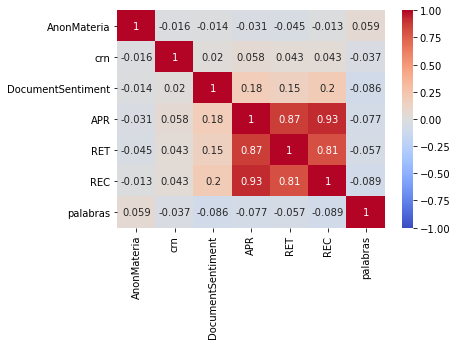

In [8]:
corr = df.corr()

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

array([[<AxesSubplot:title={'center':'REC'}>]], dtype=object)

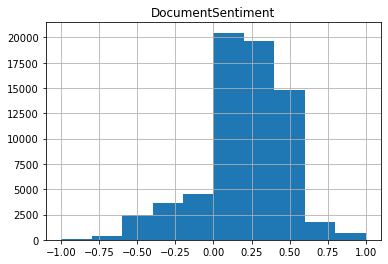

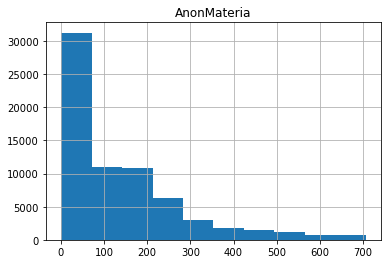

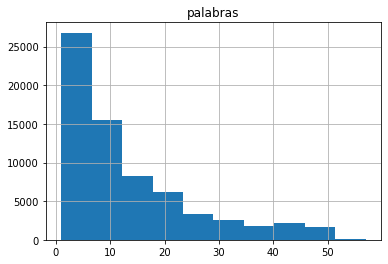

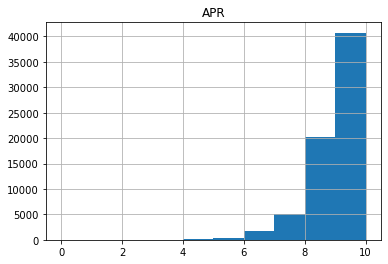

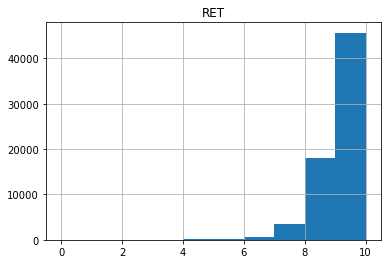

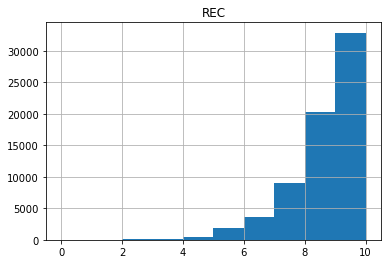

In [9]:
df.hist(column='DocumentSentiment')
df.hist(column='AnonMateria')
df.hist(column='palabras')
df.hist(column='APR')
df.hist(column='RET')
df.hist(column='REC')

<AxesSubplot:title={'center':'Departamentos'}>

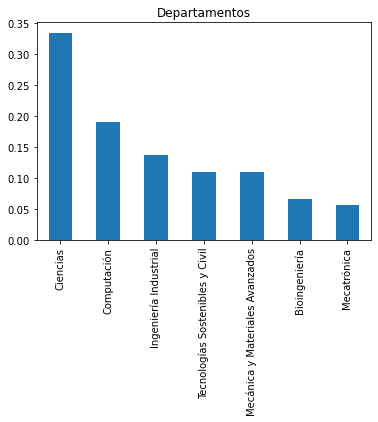

In [10]:
df['Departamento'].value_counts(normalize=True).plot(kind = 'bar', title = "Departamentos")

<AxesSubplot:title={'center':'División'}>

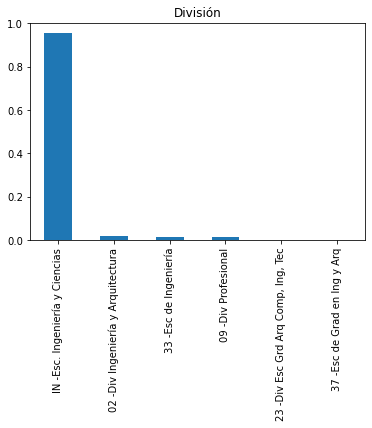

In [11]:
df['División'].value_counts(normalize=True).plot(kind = 'bar', title = "División")

<AxesSubplot:title={'center':'TipoProfesor'}>

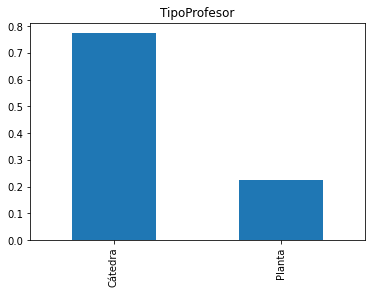

In [12]:
df['TipoProfesor'].value_counts(normalize=True).plot(kind = 'bar', title = "TipoProfesor")

<AxesSubplot:title={'center':'Categoria'}>

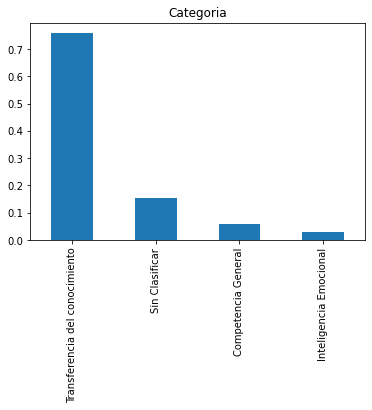

In [13]:
df['Categoria'].value_counts(normalize=True).plot(kind = 'bar', title = "Categoria")

<AxesSubplot:title={'center':'Subcategoria'}>

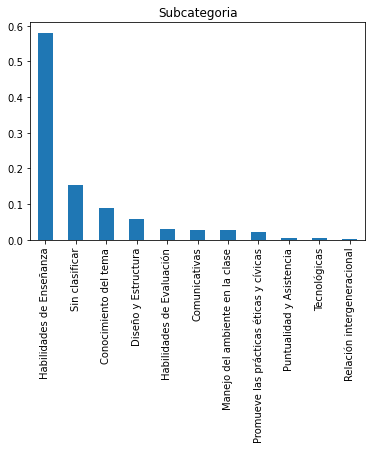

In [14]:
df['Subcategoria'].value_counts(normalize=True).plot(kind = 'bar', title = "Subcategoria")

<AxesSubplot:title={'center':'Sentimiento'}>

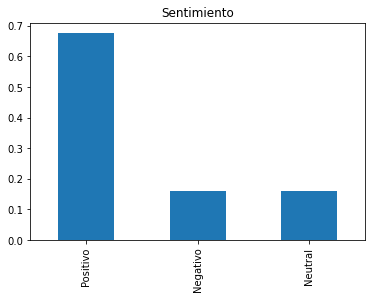

In [15]:
df['sentimiento'].value_counts(normalize=True).plot(kind = 'bar', title = "Sentimiento")

## For the purpose of the analysis, we will remove the non-classified category records

In [16]:
df_classified = df[df['Categoria'] != 'Sin Clasificar']

array([[<AxesSubplot:title={'center':'REC'}>]], dtype=object)

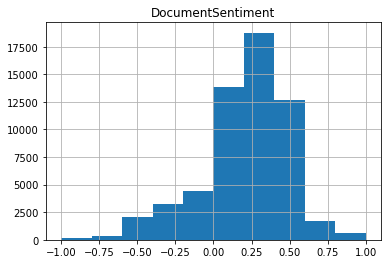

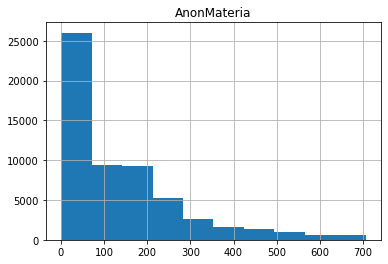

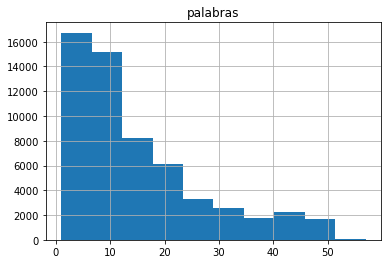

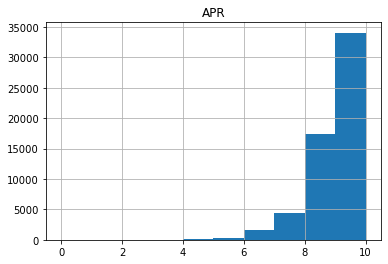

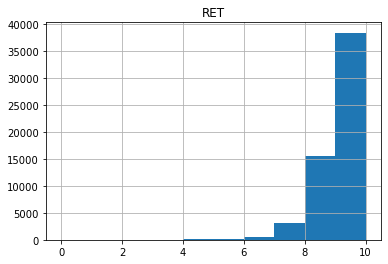

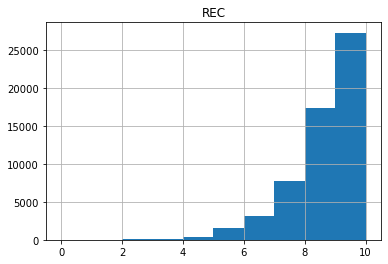

In [17]:
df_classified.hist(column='DocumentSentiment')
df_classified.hist(column='AnonMateria')
df_classified.hist(column='palabras')
df_classified.hist(column='APR')
df_classified.hist(column='RET')
df_classified.hist(column='REC')

<AxesSubplot:title={'center':'Sentiment'}>

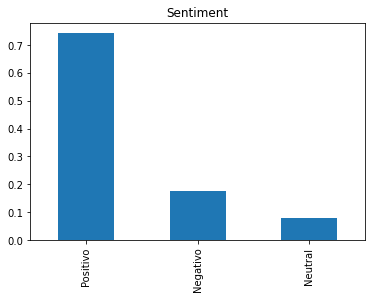

In [18]:
df_classified['sentimiento'].value_counts(normalize=True).plot(kind = 'bar', title = "Sentiment")

<AxesSubplot:title={'center':'Categories'}>

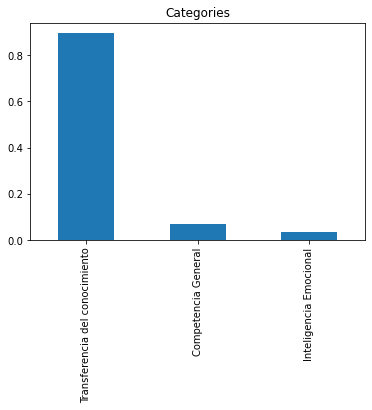

In [19]:
df_classified['Categoria'].value_counts(normalize=True).plot(kind = 'bar', title = "Categories")

<AxesSubplot:title={'center':'Subcategories'}>

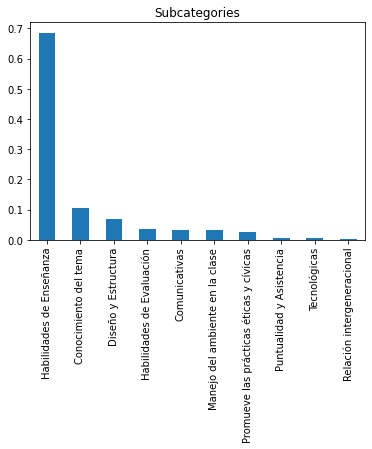

In [20]:
df_classified['Subcategoria'].value_counts(normalize=True).plot(kind = 'bar', title = "Subcategories")

In [21]:
df_negs = df_classified[df_classified['DocumentSentiment'] < 0]
df_pos = df_classified[df_classified['DocumentSentiment'] > 0]
print("Negative evaluations: ", len(df_negs))
print("Positive evaluations: ", len(df_pos))
print("Neutral evaluations:   ", len(df_classified)-len(df_pos)-len(df_negs))
print("Total evaluations:    ", len(df_classified))

Negative evaluations:  10173
Positive evaluations:  42982
Neutral evaluations:    4672
Total evaluations:     57827


<AxesSubplot:title={'center':'Negative Reviews Categories'}>

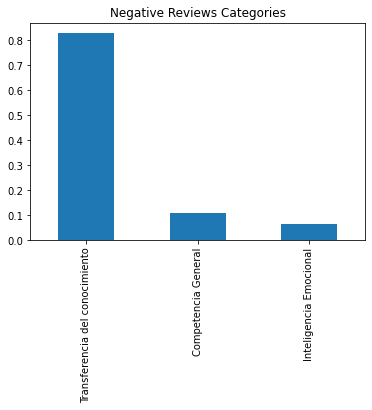

In [22]:
df_negs['Categoria'].value_counts(normalize=True).plot(kind = 'bar', title = "Negative Reviews Categories")

<AxesSubplot:title={'center':'Positive Reviews Categories'}>

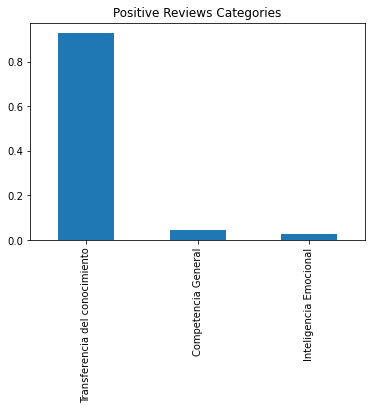

In [23]:
df_pos['Categoria'].value_counts(normalize=True).plot(kind = 'bar', title = "Positive Reviews Categories")

In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rober\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
stop_words = stopwords.words('spanish')

In [26]:
stop_words.append('clase')
stop_words.append('clase,')
stop_words.append('clase.')
stop_words.append('clases')

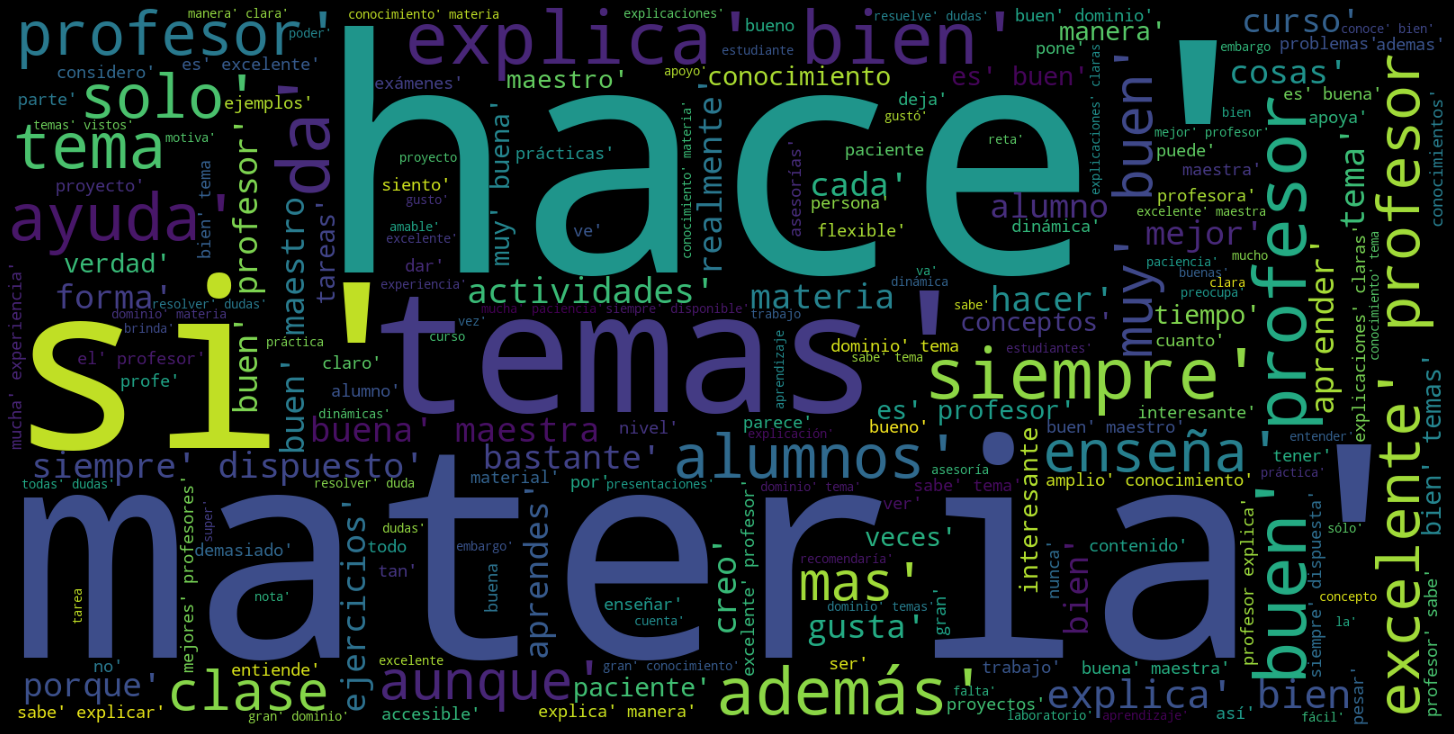

In [27]:
from wordcloud import WordCloud 

df_pos['Comentarios'].str.lower()
wordsPositive = df_pos['Comentarios'].values
wordsPositive = np.array(''.join(wordsPositive).split(' '))
wordsPositive = [word for word in wordsPositive if not word in stop_words]
wordcloud = WordCloud(width=1600, height=800).generate(str(wordsPositive))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

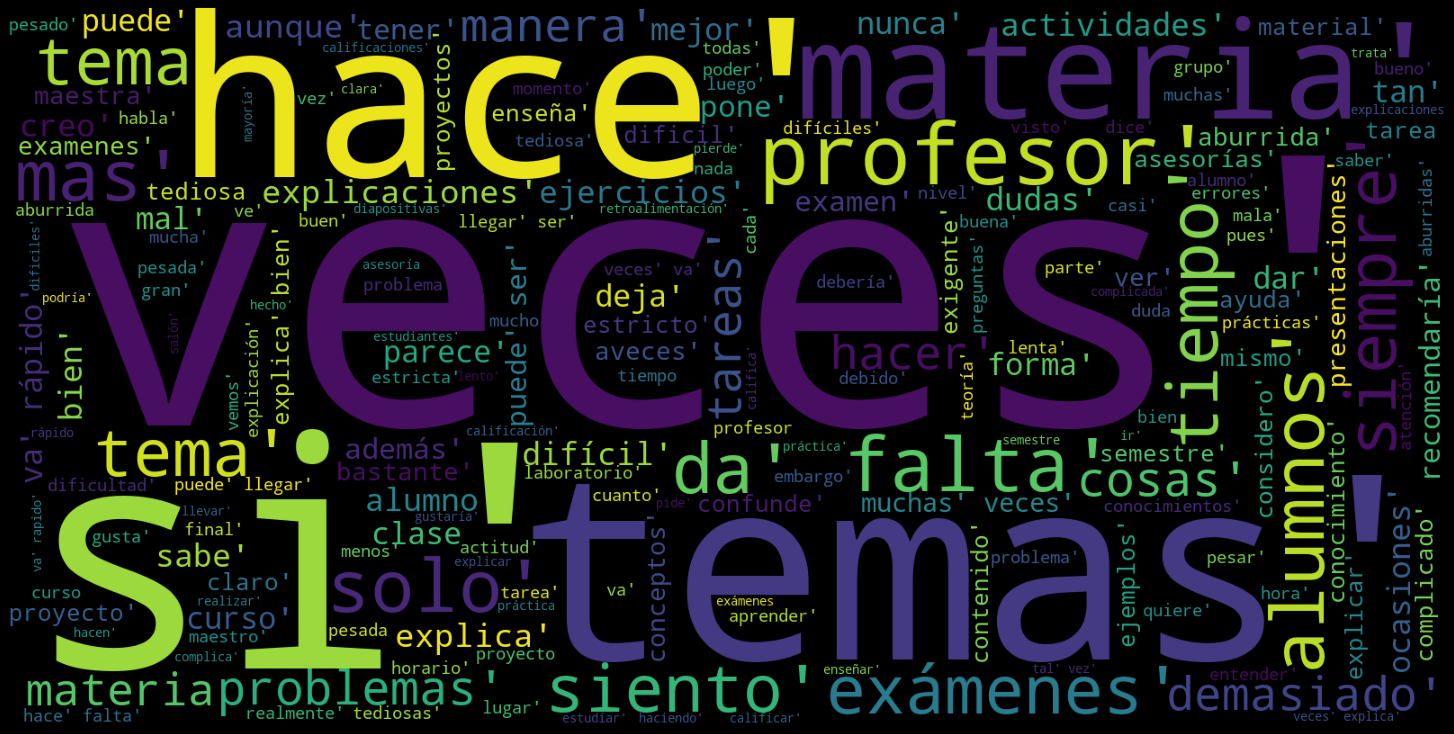

In [28]:
df_negs['Comentarios'].str.lower()
wordsNegative = df_negs['Comentarios'].values 
wordsNegative = np.array(' '.join(wordsNegative).split(' '))
wordsNegative = [word for word in wordsNegative if word not in stop_words]
wordcloudNeg = WordCloud(width=1600, height=800).generate(str(wordsNegative))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloudNeg)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [29]:
no_recomendaria = df_classified[df_classified['Pregunta'] == '¿Por qué no lo recomendaría?']

array([[<AxesSubplot:title={'center':'DocumentSentiment'}>]], dtype=object)

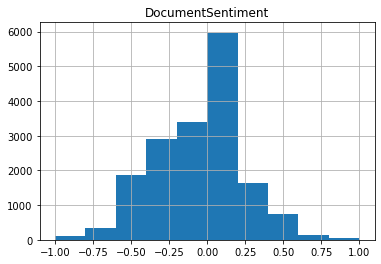

In [30]:
no_recomendaria.hist(column='DocumentSentiment')

In [31]:
pip install googletrans

In [32]:
from googletrans import Translator
translator = Translator()


In [33]:
translator.translate('hubo algunos conceptos que creo faltaron cubrir o mencionar acerca de ds, como la industria láctea y de la carne, se menciono pero la profesora no hizo mucho énfasis y creo que es algo muy importante').text

'There were some concepts that I think were missing to cover or mention about ds, such as the dairy and meat industry, it was mentioned but the teacher did not make much emphasis and I think it is something very important'

In [34]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

def sentiment_scores(sentence): 
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
      
    print(sentiment_dict) 
    print("Result: ", end = " ")   
    if sentiment_dict['compound'] >= 0.05 : 
        print("Positive") 
    elif sentiment_dict['compound'] <= - 0.05 : 
        print("Negative") 
    else : 
        print("Neutral") 

In [36]:
def return_score(sentence): 
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
      
    return sentiment_dict['compound']

In [37]:
sentiment_scores(translator.translate('es complicado seguir la clase y las actividades').text)

{'neg': 0.217, 'neu': 0.783, 'pos': 0.0, 'compound': -0.3612}
Result:  Negative


# Will run a comparison between the given sentiment score VS a new sentiment score calculated using VADER and Google Transaltor API

In [38]:
test_df = df_classified[:1000]

In [39]:
test_df['TranslatedComment'] = test_df.apply(lambda row : translator.translate(row['Comentarios']).text, axis = 1)

C:\Users\rober\anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
test_df.head()

,Rectoría,Campus,División,Departamento,AnonMateria,crn,Pregunta,NominaFict,TipoProfesor,ProfesorTitular,Comentarios,DocumentSentiment,sentimiento,Categoria,Subcategoria,APR,RET,REC,palabras,TranslatedComment
ID,,,,,,,,,,,,,,,,,,,,
1,Región Norte,Monterrey,IN -Esc. Ingeniería y Ciencias,Computación,1,9785,Comentarios al profesor (a):,L00000092,Cátedra,SI,hace ejercicios con aplicaciones en la vida real,0.10,Positivo,Transferencia del conocimiento,Habilidades de Enseñanza,9.592593,9.666667,9.407407,8.0,exercises with real life apps
2,Región Norte,Monterrey,IN -Esc. Ingeniería y Ciencias,Computación,1,9785,Comentarios al profesor (a):,L00000092,Cátedra,SI,le importa y se preocupa por sus alumnos siemp...,0.30,Positivo,Competencia General,Promueve las prácticas éticas y cívicas,9.592593,9.666667,9.407407,12.0,cares and cares about his students whenever th...
4,Región Norte,Monterrey,IN -Esc. Ingeniería y Ciencias,Computación,1,9785,Comentarios al profesor (a):,L00000092,Cátedra,SI,"muy buena maestra. explica muy bien, y buena a...",0.48,Positivo,Transferencia del conocimiento,Habilidades de Enseñanza,9.592593,9.666667,9.407407,10.0,"very good teacher. explains very well, and alw..."
5,Región Norte,Monterrey,IN -Esc. Ingeniería y Ciencias,Computación,1,9785,Comentarios al profesor (a):,L00000092,Cátedra,SI,"posee amplios conocimientos, por lo que siempr...",0.09,Positivo,Transferencia del conocimiento,Habilidades de Enseñanza,9.592593,9.666667,9.407407,13.0,"has extensive knowledge, so you can always ans..."
6,Región Norte,Monterrey,IN -Esc. Ingeniería y Ciencias,Computación,1,9785,Comentarios al profesor (a):,L00000092,Cátedra,SI,siempre ayuda al alumno y da buena retroalimen...,0.46,Positivo,Competencia General,Promueve las prácticas éticas y cívicas,9.592593,9.666667,9.407407,8.0,always helps the student and gives good feedback.


In [41]:
test_df['NewScore'] = test_df.apply(lambda row : return_score(row['TranslatedComment']), axis = 1)

C:\Users\rober\anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
test_df[['Comentarios','DocumentSentiment','NewScore']][0:30]

,Comentarios,DocumentSentiment,NewScore
ID,,,
1,hace ejercicios con aplicaciones en la vida real,0.10,0.0000
2,le importa y se preocupa por sus alumnos siemp...,0.30,0.8402
4,"muy buena maestra. explica muy bien, y buena a...",0.48,0.8169
5,"posee amplios conocimientos, por lo que siempr...",0.09,0.0000
6,siempre ayuda al alumno y da buena retroalimen...,0.46,0.6705
7,una maestra con vocación para enseñar y mucho ...,0.27,0.6240
8,"es buena maestra; no obstante, podría implemen...",0.13,0.7902
9,es estricta al evaluar,-0.10,0.0000
10,explicacion dificiles de entender,-0.15,-0.3612


In [43]:
test_negs = test_df[test_df['NewScore'] < 0]
test_negs[['Comentarios','NewScore','Categoria']][100:130]

,Comentarios,NewScore,Categoria
ID,,,
519,de los peores si no es que el peor curso que h...,-0.4376,Transferencia del conocimiento
520,"la clase no estan bien planeada, la forma de e...",-0.3612,Transferencia del conocimiento
529,no tengo elementos para evaluar a mis profesor...,-0.6808,Competencia General
532,sin comentarios,-0.5574,Competencia General
538,no tengo elementos para evaluar a mis profesor...,-0.2755,Competencia General
542,sin comentarios,-0.2960,Competencia General
545,algunas lecturas son muy largas y hacen que el...,-0.2960,Transferencia del conocimiento
546,deberían estar los encargados del mismo campus...,-0.2960,Transferencia del conocimiento
548,no se le da el seguimiento correcto a tu apren...,-0.2960,Transferencia del conocimiento


array([[<AxesSubplot:title={'center':'NewScore'}>]], dtype=object)

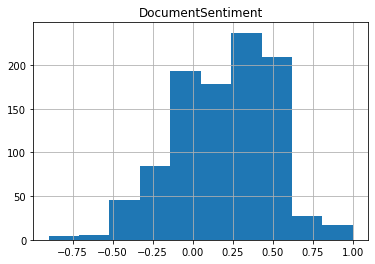

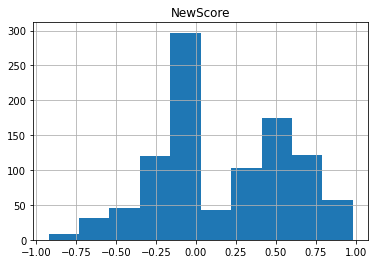

In [44]:
test_df.hist(column='DocumentSentiment')
test_df.hist(column='NewScore')

<AxesSubplot:>

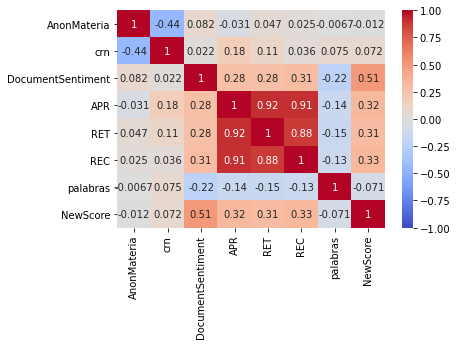

In [45]:

corr2 = test_df.corr()

sns.heatmap(corr2, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [49]:
test_df.head()

,Rectoría,Campus,División,Departamento,AnonMateria,crn,Pregunta,NominaFict,TipoProfesor,ProfesorTitular,...,DocumentSentiment,sentimiento,Categoria,Subcategoria,APR,RET,REC,palabras,TranslatedComment,NewScore
ID,,,,,,,,,,,,,,,,,,,,,
1,Región Norte,Monterrey,IN -Esc. Ingeniería y Ciencias,Computación,1,9785,Comentarios al profesor (a):,L00000092,Cátedra,SI,...,0.10,Positivo,Transferencia del conocimiento,Habilidades de Enseñanza,9.592593,9.666667,9.407407,8.0,exercises with real life apps,0.0000
2,Región Norte,Monterrey,IN -Esc. Ingeniería y Ciencias,Computación,1,9785,Comentarios al profesor (a):,L00000092,Cátedra,SI,...,0.30,Positivo,Competencia General,Promueve las prácticas éticas y cívicas,9.592593,9.666667,9.407407,12.0,cares and cares about his students whenever th...,0.8402
4,Región Norte,Monterrey,IN -Esc. Ingeniería y Ciencias,Computación,1,9785,Comentarios al profesor (a):,L00000092,Cátedra,SI,...,0.48,Positivo,Transferencia del conocimiento,Habilidades de Enseñanza,9.592593,9.666667,9.407407,10.0,"very good teacher. explains very well, and alw...",0.8169
5,Región Norte,Monterrey,IN -Esc. Ingeniería y Ciencias,Computación,1,9785,Comentarios al profesor (a):,L00000092,Cátedra,SI,...,0.09,Positivo,Transferencia del conocimiento,Habilidades de Enseñanza,9.592593,9.666667,9.407407,13.0,"has extensive knowledge, so you can always ans...",0.0000
6,Región Norte,Monterrey,IN -Esc. Ingeniería y Ciencias,Computación,1,9785,Comentarios al profesor (a):,L00000092,Cátedra,SI,...,0.46,Positivo,Competencia General,Promueve las prácticas éticas y cívicas,9.592593,9.666667,9.407407,8.0,always helps the student and gives good feedback.,0.6705


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
feature_names_net = ['Campus','División','Departamento','AnonMateria','NominaFict','TipoProfesor','ProfesorTitular','sentimiento','palabras']
XNet = test_df[feature_names_net]
yNet = test_df['Subcategoria']

columns_to_encode = ['Campus','División','Departamento','AnonMateria','NominaFict','TipoProfesor','ProfesorTitular','sentimiento']
columns_to_scale  = ['palabras']

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)
enc    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  =    scaler.fit_transform(XNet[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(XNet[columns_to_encode])
YNet            =    enc.fit_transform(yNet[:, np.newaxis])
# Concatenate (Column-Bind) Processed Columns Back Together
XNet = np.concatenate([scaled_columns, encoded_columns], axis=1)

C:\Users\rober\anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


In [92]:
YNet

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    XNet, YNet, test_size=0.25, random_state=2)

In [78]:
n_features = XNet.shape[1]
n_classes = YNet.shape[1]
print(n_features)
print(n_classes)

105
10


In [85]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(50, activation='relu', input_shape=(105,)))

model.add(Dense(30, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [86]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
hc = model.fit(X_train, Y_train,epochs=100, batch_size=1, verbose=1, validation_data=(X_test, Y_test))

Train on 750 samples, validate on 250 samples
Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 1.3092 - accuracy: 0.6320 - val_loss: 1.2716 - val_accuracy: 0.6160
Epoch 2/100
750/750 [==============================] - 2s 2ms/step - loss: 1.1150 - accuracy: 0.6453 - val_loss: 1.2441 - val_accuracy: 0.5960
Epoch 3/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0615 - accuracy: 0.6467 - val_loss: 1.2238 - val_accuracy: 0.6280
Epoch 4/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0163 - accuracy: 0.6627 - val_loss: 1.2312 - val_accuracy: 0.6360
Epoch 5/100
750/750 [==============================] - 2s 2ms/step - loss: 0.9877 - accuracy: 0.6627 - val_loss: 1.2676 - val_accuracy: 0.5920
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.9577 - accuracy: 0.6653 - val_loss: 1.2673 - val_accuracy: 0.6120
Epoch 7/100
750/750 [==============================] - 2s 2ms/step - loss: 0.9227 - accuracy: 0.

750/750 [==============================] - 2s 2ms/step - loss: 0.6071 - accuracy: 0.7347 - val_loss: 2.8086 - val_accuracy: 0.5760
Epoch 58/100
750/750 [==============================] - 2s 2ms/step - loss: 0.5950 - accuracy: 0.7493 - val_loss: 2.8740 - val_accuracy: 0.6040
Epoch 59/100
750/750 [==============================] - 2s 2ms/step - loss: 0.5991 - accuracy: 0.7427 - val_loss: 2.9389 - val_accuracy: 0.6160
Epoch 60/100
750/750 [==============================] - 2s 2ms/step - loss: 0.6008 - accuracy: 0.7520 - val_loss: 3.0168 - val_accuracy: 0.5920
Epoch 61/100
750/750 [==============================] - 2s 2ms/step - loss: 0.5857 - accuracy: 0.7453 - val_loss: 3.0451 - val_accuracy: 0.6080
Epoch 62/100
750/750 [==============================] - 2s 2ms/step - loss: 0.5967 - accuracy: 0.7453 - val_loss: 2.9976 - val_accuracy: 0.6000
Epoch 63/100
750/750 [==============================] - 2s 2ms/step - loss: 0.5813 - accuracy: 0.7467 - val_loss: 3.0672 - val_accuracy: 0.6000
Epoch

In [87]:
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

250/250 [==============================] - 0s 44us/step
[3.937518047332764, 0.5799999833106995]


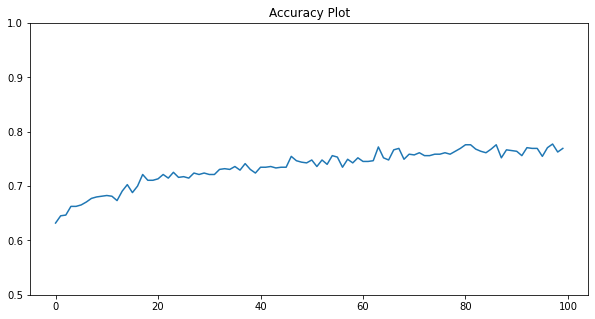

In [88]:
plt.figure(figsize=(10, 5))

val_acc = hc.history['accuracy']
plt.plot(val_acc)

plt.title("Accuracy Plot")
plt.ylim(0.5, 1)
plt.show()

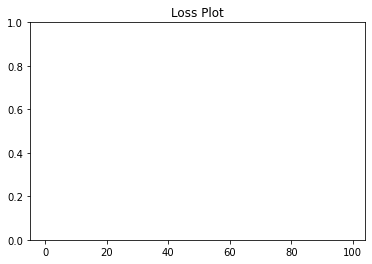

In [89]:
val_loss = hc.history['val_loss']
plt.plot(val_loss)
    
plt.title("Loss Plot")
plt.ylim(0, 1)
plt.show()

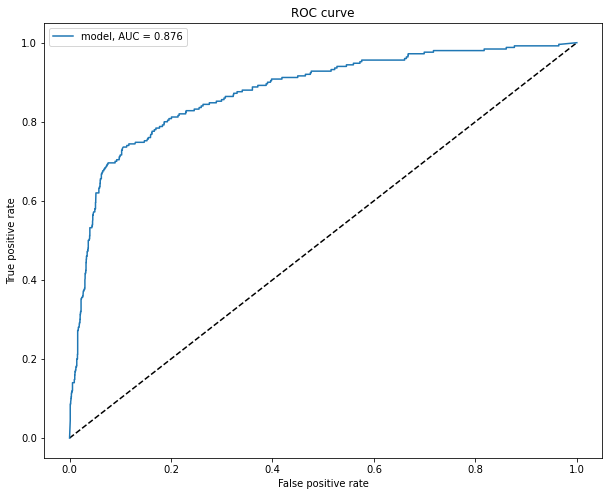

In [90]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')

    
Y_pred = model.predict(X_test)
fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format('model', auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [94]:
enc.inverse_transform(Y_pred)

array([['Habilidades de Enseñanza'],
       ['Conocimiento del tema'],
       ['Conocimiento del tema'],
       ['Habilidades de Enseñanza'],
       ['Conocimiento del tema'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Tecnológicas'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Tecnológicas'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Manejo del ambiente en la clase'],
       ['Habilidades de Enseñanza'],
       ['Conocimiento del tema'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseña

In [98]:
enc.inverse_transform(Y_test)

array([['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Conocimiento del tema'],
       ['Conocimiento del tema'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Conocimiento del tema'],
       ['Comunicativas'],
       ['Tecnológicas'],
       ['Habilidades de Enseñanza'],
       ['Conocimiento del tema'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Evaluación'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Conocimiento del tema'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Conocimiento del tema'],
       ['Habilidades de Enseñanza'],
       ['Habilidades de Enseñanza'],
       ['Diseño y Estructura'],
       ['Habilidades de Enseñanza'],
       ['

In [116]:
enc.categories_

[array(['Comunicativas', 'Conocimiento del tema', 'Diseño y Estructura',
        'Habilidades de Enseñanza', 'Habilidades de Evaluación',
        'Manejo del ambiente en la clase',
        'Promueve las prácticas éticas y cívicas',
        'Puntualidad y Asistencia', 'Relación intergeneracional',
        'Tecnológicas'], dtype=object)]

In [118]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(enc.inverse_transform(Y_test), enc.inverse_transform(Y_pred), 
        labels=['Comunicativas', 'Conocimiento del tema', 'Diseño y Estructura',
        'Habilidades de Enseñanza', 'Habilidades de Evaluación',
        'Manejo del ambiente en la clase',
        'Promueve las prácticas éticas y cívicas',
        'Puntualidad y Asistencia', 'Relación intergeneracional',
        'Tecnológicas'])

array([[[233,   9],
        [  5,   3]],

       [[197,  16],
        [ 24,  13]],

       [[231,   7],
        [ 10,   2]],

       [[ 39,  57],
        [ 35, 119]],

       [[243,   1],
        [  4,   2]],

       [[240,   5],
        [  5,   0]],

       [[244,   1],
        [  5,   0]],

       [[245,   2],
        [  3,   0]],

       [[249,   0],
        [  1,   0]],

       [[224,   7],
        [ 13,   6]]], dtype=int64)